** Consider a Kohonen network with 100 neurons arranged in the form of a two dimensional lattice with 10 rows and 10 columns .
The network is required to classify two-dimensional input vectors such that each neuron in the network should respond only to the input vectors occurring in its region. **

** Train the network with 1500 two-dimensional input vectors generated randomly in a square region in the interval between -1 and +1. **

** Select initial synaptic weights randomly in the same interval (-1 and +1 )and take learning rate parameter α is equal to 0.1. **

** Test the performance of the self organizing neurons using the following **

** Input vectors:
X1 =[0.1 0.8], X2 =[0.5 -0.2], X3 =[-0.8 -0.9], X4 =[-0.0.6 0.9] **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def myPlot(dataX, dataY, matrixX, matrixY, N, name, index):
    fig = plt.figure(index)
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.title(name)
    plt.scatter(dataX, dataY)
    plt.scatter(matrixX, matrixY, c = 'r')
    for i in range(0, N):
        plt.plot(matrixX[N*i:N*(i+1)], matrixY[N*i:N*(i+1)], c='g')
        plt.plot(matrixX[i::N], matrixY[i::N], c = 'y')
    plt.show()
    name.replace(" ", "")

In [3]:
def plot_weights(wChange, epoch, N):
    fig = plt.figure(figsize = (10, 5), dpi = 80)
    x = [i for i in range(epoch)]
    name = str(N) + '*' + str(N) + ' topology weight change VS iterations'
    plt.title(name)
    plt.xlabel('Iterations')
    plt.ylabel('Weight Change')
    plt.xlim(0, epoch)
    plt.scatter(x, wChange, c = 'g', marker = 's')
    name.replace(" ", "")
    plt.show()

In [4]:
def train(dataX, dataY, epoch, N):

    dataLen = len(dataX)

    # generate random weights for output layer
    weightsX = np.random.uniform(low=-1, high=1, size=N*N) 
    weightsY = np.random.uniform(low=-1, high=1, size=N*N) 
    
    # initial sigma value
    sigma0 = (N-1) * (2**0.5)

    # suggested tau value
    tau = epoch / np.log(sigma0)

    #initial learning rate
    lr0 = 0.1

    figNumber = 0
    wChange = []

    # training process
    for i in range(epoch):
        # pick data to training network at random
        index = np.random.randint(0, dataLen-1)
        # index for winner neuron
        winnerIndex = 0
        minDist = None
        for j in range(N*N):
            # Euclidean distance for weights vector
            dist = ( (weightsX[j] - dataX[index])**2 + (weightsY[j] - dataY[index])**2 )**0.5
            if minDist is None or dist < minDist:
                minDist = dist
                winnerIndex = j

        # corresponding row and column index for winner neuron
        winnerRow = winnerIndex / N
        winnerCol = winnerIndex % N

        # calculate the learning rate
        lr = lr0 * np.exp(-i/float(epoch))
        if lr < 0.01:
            lr = 0.01

        # calculate the sigma value
        sigma = sigma0 * np.exp(-i/tau)

        # weight change per iteration
        weightChange = 0
        for j in range(N*N):
            currRow = j / N
            currCol = j % N
            distToWinner = ((currRow - winnerRow)**2 +(currCol - winnerCol)**2 )**0.5
            neighborFunc = np.exp(-distToWinner**2 / (2 * (sigma)**2))
            xChange =  lr*neighborFunc*(dataX[index] - weightsX[j])
            yChange =  lr*neighborFunc*(dataY[index] - weightsY[j])
            weightsX[j] = weightsX[j] + xChange
            weightsY[j] = weightsY[j] + yChange
            weightChange += 0.5 * (xChange**2 + yChange**2)**0.5

        weightChange /= N*N
        wChange.append(weightChange)

        if i%1000 ==0 :
            if i == 0:
                name = str(i) + ' iteration'
            else:
                name = str(i) + ' iterations'
            name = str(N) + '*' + str(N) + ' topology ' + name
            myPlot(dataX, dataY, weightsX, weightsY, N, name, figNumber)
            figNumber += 1

    name = str(N) + '*' + str(N) + ' topology ' + str(epoch) + ' iterations'
    myPlot(dataX, dataY, weightsX, weightsY, N, name, figNumber)
    
    plot_weights(wChange, epoch, N)
    
    return (weightsX, weightsY)

In [5]:
def testing(dataX, dataY, weightsX, weightsY, N):
    
    # index for winner neuron
    winnerIndex = 0
    minDist = None
    for j in range(N*N):
        # Euclidean distance for weights vector
        dist = ( (weightsX[j] - dataX)**2 + (weightsY[j] - dataY)**2 )**0.5
        if minDist is None or dist < minDist:
            minDist = dist
            winnerIndex = j
            
    return winnerIndex

In [6]:
x = np.random.uniform(low= -1, high= 1, size= 1500)
y = np.random.uniform(low= -1, high= 1, size= 1500)
N = 10
epoch = 10000

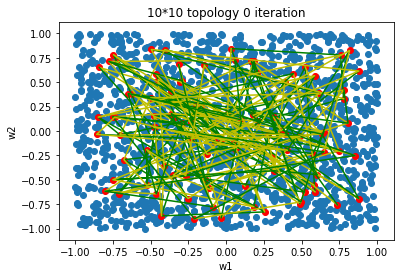

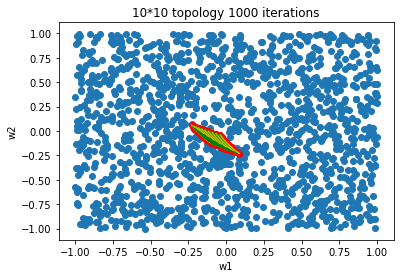

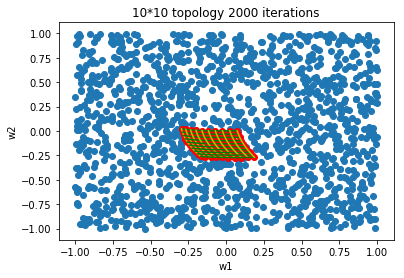

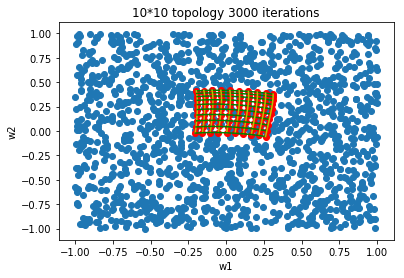

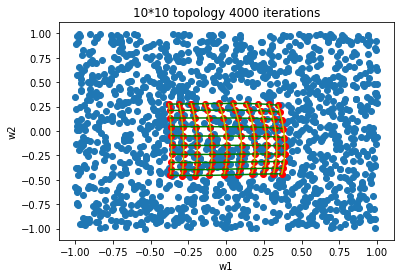

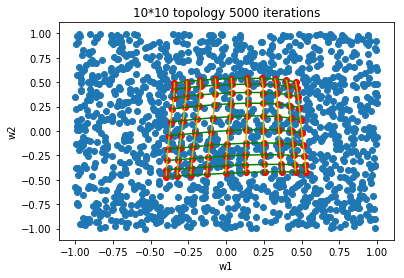

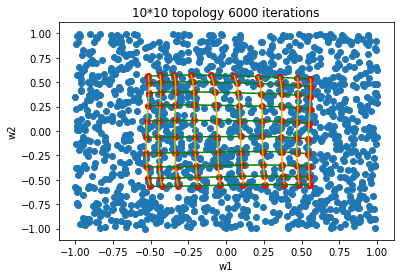

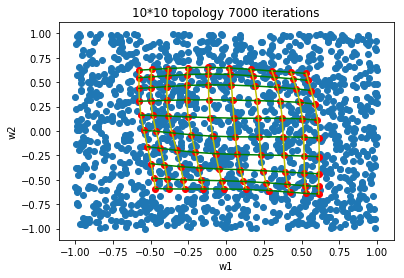

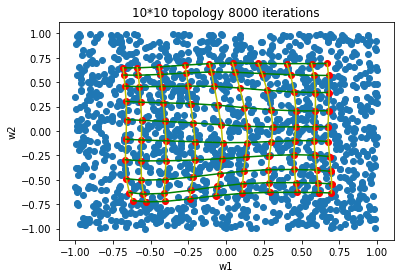

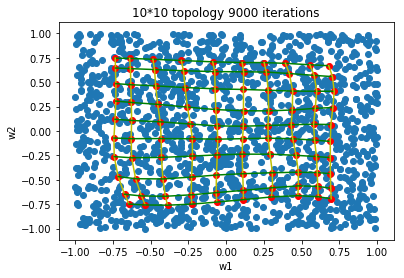

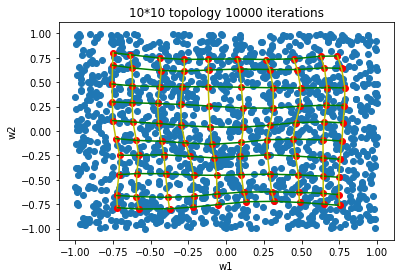

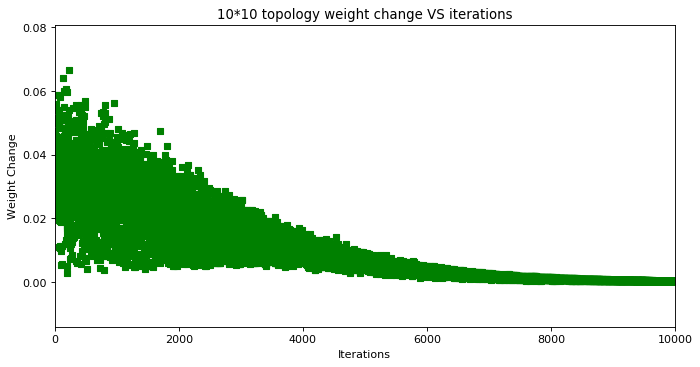

In [7]:
weightsX, weightsY = train(x, y, epoch, N)

In [8]:
X1 =[0.1, 0.8] 
X2 =[0.5, -0.2]
X3 =[-0.8, -0.9]
X4 =[-0.06, 0.9]

In [9]:
winnerIndex1 = testing(X1[0], X1[1], weightsX, weightsY, N)
winnerIndex2 = testing(X2[0], X2[1], weightsX, weightsY, N)
winnerIndex3 = testing(X3[0], X3[1], weightsX, weightsY, N)
winnerIndex4 = testing(X4[0], X4[1], weightsX, weightsY, N)

In [10]:
print("\nNeuron {} respond to the input vector X = {}" .format(winnerIndex1, X1))
print("\nNeuron {} respond to the input vector X = {}" .format(winnerIndex2, X2))
print("\nNeuron {} respond to the input vector X = {}" .format(winnerIndex3, X3))
print("\nNeuron {} respond to the input vector X = {}" .format(winnerIndex4, X4))


Neuron 5 respond to the input vector X = [0.1, 0.8]

Neuron 67 respond to the input vector X = [0.5, -0.2]

Neuron 90 respond to the input vector X = [-0.8, -0.9]

Neuron 4 respond to the input vector X = [-0.06, 0.9]
